### Helper for loading the datasets

In [1]:
import pandas as pd
from usp_stream_datasets import *

pd.set_option('mode.use_inf_as_na', True)

### Load a specific Dataset

/tmp/ipykernel_184/1381238788.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chunk_id'] = chunk_ids


<Figure size 1000x1000 with 0 Axes>

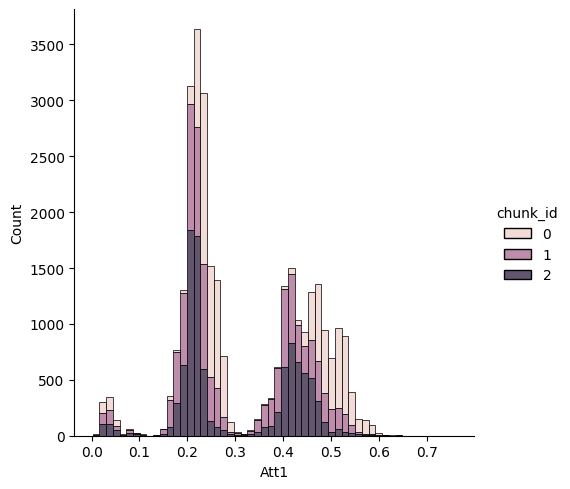

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

with pd.option_context('mode.use_inf_as_na', True):

    dataset = "Incremental-gradual (imbal.)"
    df_data = load_insect_dataset(insects_datasets[dataset]["filename"])
    df_aedes = df_data[df_data["class"] == b"ae-aegypti-female"]
    
    df = df_aedes
    
    # Define the desired number of chunks
    num_chunks = 3
    
    # Calculate the chunk size based on the number of chunks
    chunk_size = len(df) // num_chunks + 1
    
    # Generate chunk IDs
    chunk_ids = np.repeat(range(num_chunks), chunk_size)[:len(df)]
    
    # Add chunk IDs to DataFrame
    df['chunk_id'] = chunk_ids
    
    # Split the DataFrame into chunks based on chunk IDs
    chunks = [group for _, group in df.groupby('chunk_id')]
    
    # Now `chunks` is a list of DataFrames, each containing a chunk of the original DataFrame
    # You can iterate through these chunks or process them as needed
    
    # Concatenate chunks back together if needed
    concatenated_df = pd.concat(chunks, ignore_index=True)  
    
    plt.figure(figsize=(10,10)) 
    sns.displot(concatenated_df, x="Att1", hue="chunk_id", multiple="stack")
    plt.show()

[(0, 10000), (10000, 20000), (20000, 30000), (30000, 40000)]


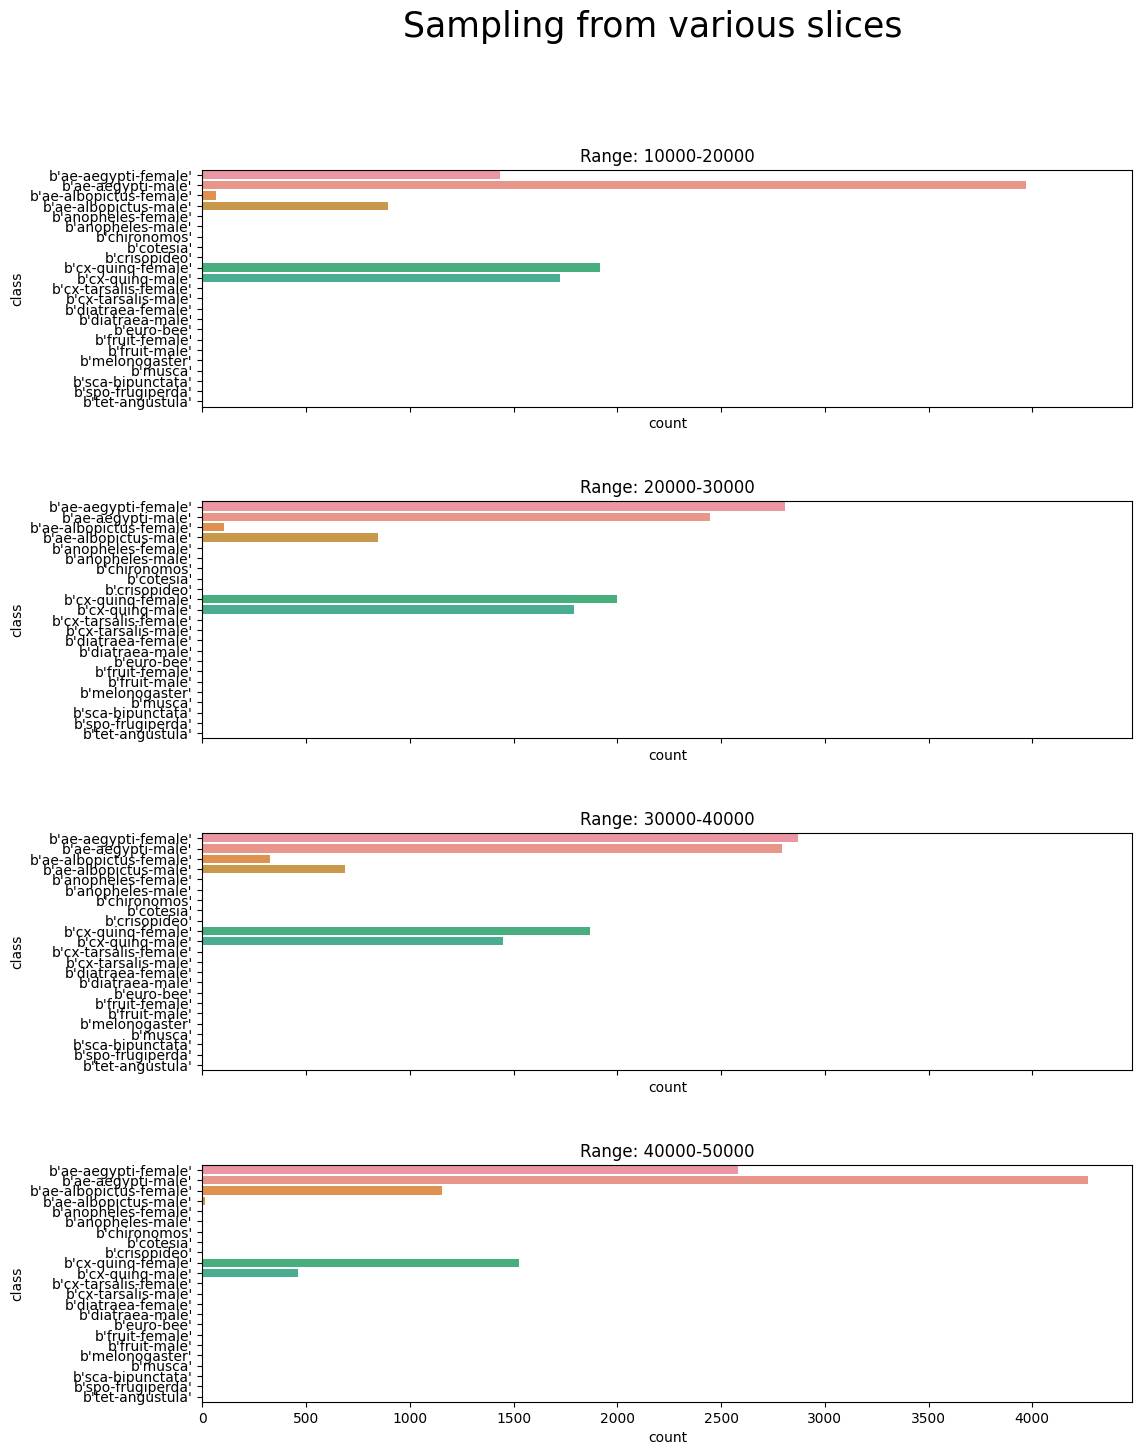

In [3]:
start_idx = 10000
end_idx = 50000

data = df_data.iloc[start_idx:end_idx]
rows = 2
columns = 2
chunks = rows * columns
chunksize = int(len(data["class"]) / chunks)
ranges = [(i*chunksize, i*chunksize + chunksize) for i in range(chunks)]
print (ranges)


fig, ax = plt.subplots(nrows= rows * columns, sharex=True, figsize=(12,16))

for i in range(len(ranges)):
    r = ranges[i]
    start = start_idx + r[0]
    end = start_idx + r[1]
    data = df_data.iloc[start:end]
    sns.countplot(ax=ax[i], y=data["class"], order = mosquito_species)   
    ax[i].set_title(f"Range: {start}-{end}")

fig.subplots_adjust(hspace=0.4, wspace=.3) 
plt.suptitle('Sampling from various slices',fontsize=25)
plt.show()

/home/lucas.helfstein/.cache/pypoetry/virtualenvs/drifts-d3CkQaEu-py3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lucas.helfstein/.cache/pypoetry/virtualenvs/drifts-d3CkQaEu-py3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lucas.helfstein/.cache/pypoetry/virtualenvs/drifts-d3CkQaEu-py3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lucas.helfstein/.cache/pypoetry/virtualenvs/d

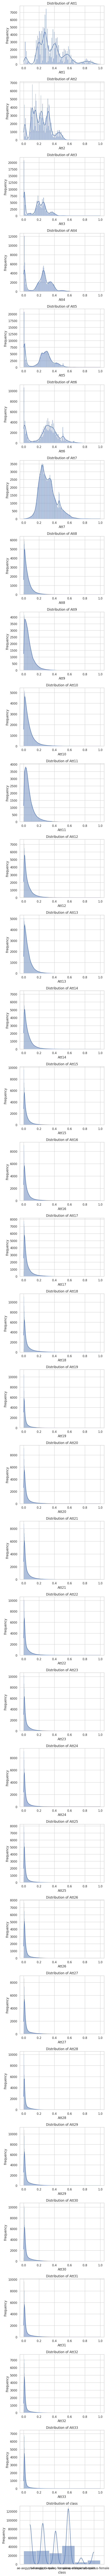

In [58]:
df = df_data

# Set the style of the plots
sns.set(style="whitegrid")

# Get the list of column names
columns = df.columns

# Calculate the number of rows and columns for subplots
n_rows = len(columns)
n_cols = 1

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6, 4 * n_rows))

# Loop through each column and create a distribution plot
for i, column in enumerate(columns):
    ax = axes[i] if n_rows > 1 else axes  # Handle single-row case
    sns.histplot(data=df, x=column, ax=ax, kde=True)  # You can use other Seaborn functions like sns.distplot if needed
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Create some ranges for plotting

In [59]:
start_idx = 10000
end_idx = 50000

data = df_data.iloc[start_idx:end_idx]
rows = 2
columns = 2
chunks = rows * columns
chunksize = int(len(data["class"]) / chunks)
ranges = [(i*chunksize, i*chunksize + chunksize) for i in range(chunks)]

print (ranges)

[(0, 10000), (10000, 20000), (20000, 30000), (30000, 40000)]


### Plot the previous distributions

/home/lucas.helfstein/.cache/pypoetry/virtualenvs/drifts-d3CkQaEu-py3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lucas.helfstein/.cache/pypoetry/virtualenvs/drifts-d3CkQaEu-py3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lucas.helfstein/.cache/pypoetry/virtualenvs/drifts-d3CkQaEu-py3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lucas.helfstein/.cache/pypoetry/virtualenvs/drifts-d3Ck

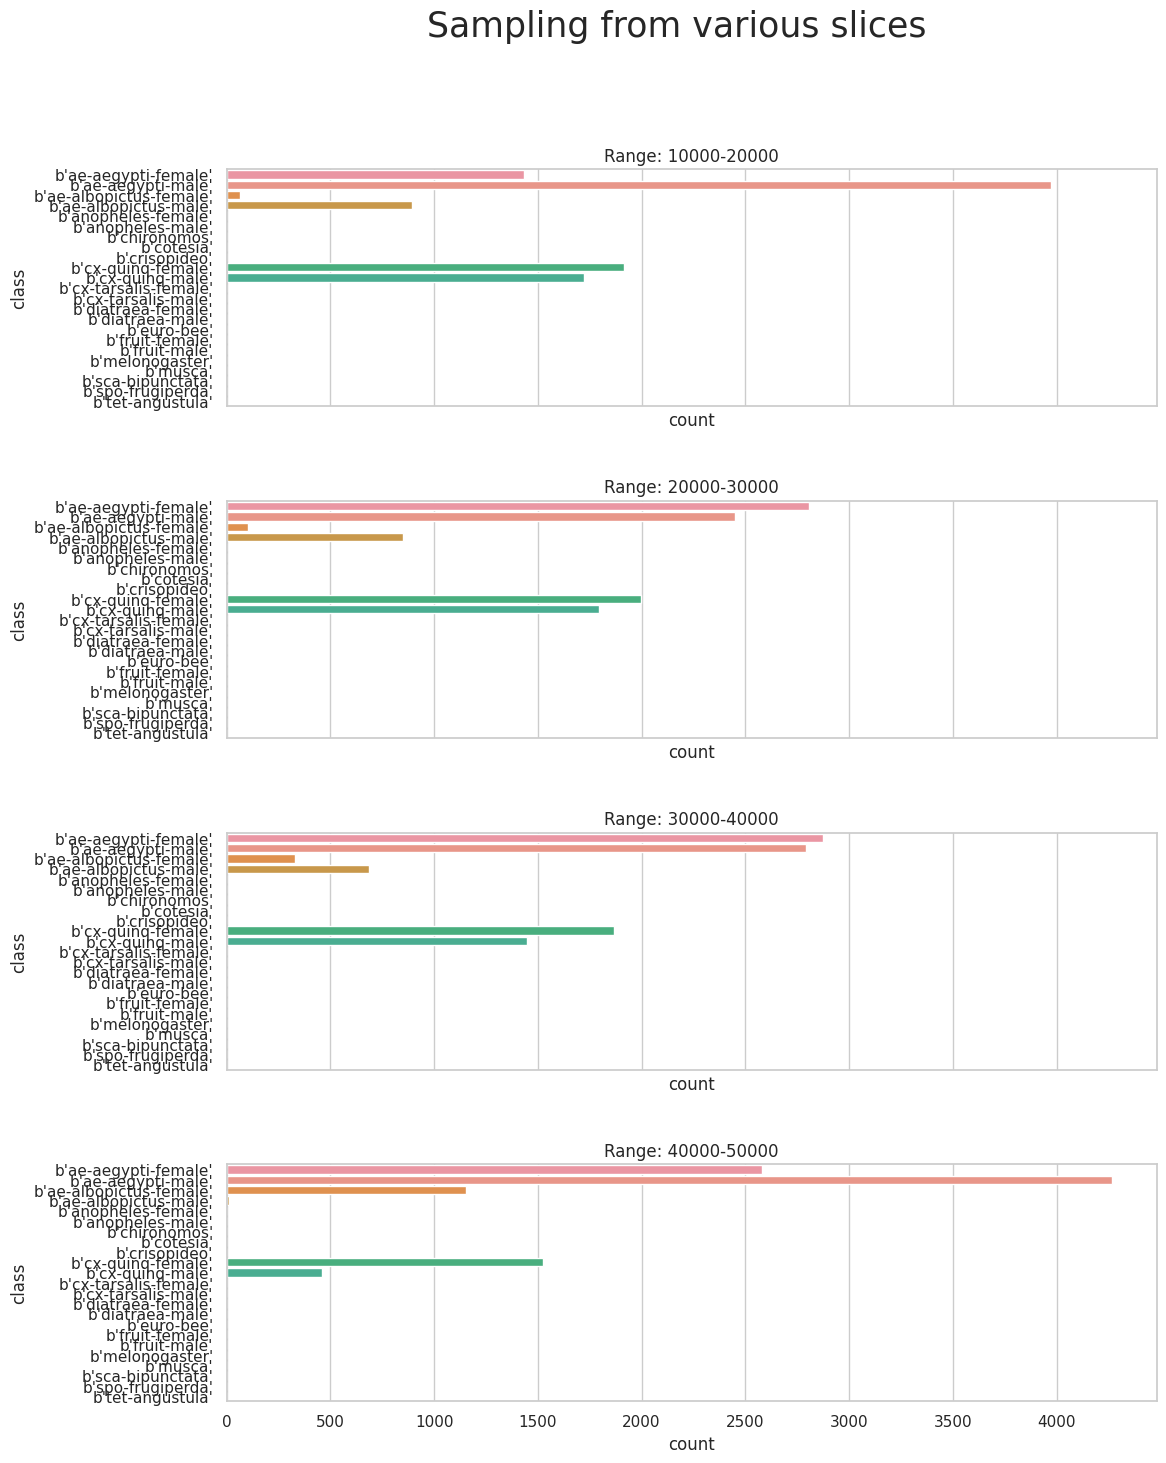

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows= rows * columns, sharex=True, figsize=(12,16))

for i in range(len(ranges)):
    r = ranges[i]
    start = start_idx + r[0]
    end = start_idx + r[1]
    data = df_data.iloc[start:end]
    sns.countplot(ax=ax[i], y=data["class"], order = mosquito_species)   
    ax[i].set_title(f"Range: {start}-{end}")

fig.subplots_adjust(hspace=0.4, wspace=.3) 
plt.suptitle('Sampling from various slices',fontsize=25)
plt.show()

O trabalho consiste em investigar a variação de $P(X, Y)$, a medida que $P(Y)$ vai variando ao longo da stream e as classes ficam desbalanceadas. Não é necessariamente uma questão de variações em $P(X)$.

Types of concept drift, from page 7 of [Challenges in Benchmarking Stream Learning
Algorithms with Real-world Data](https://arxiv.org/pdf/2005.00113.pdf):

- $X → Y$: the class label is derived from the behavior of the instance. One example
is recognizing specific body movements of a person with sensors. The joint
distribution is often written as $P (X, Y ) = P (Y |X)P (X)$;

- $Y → X$ : the class label determines the values of the features. One example is a
disease diagnosis in which the disease causes symptoms. The joint distribution
is often written as $P (X, Y ) = P (X|Y )P (Y )$.


To simplify our discussion, we call $P_A$ the probability before the drift and $P_B$ the probability
after the drift has occurred so that we can compare both distributions.


*Definition 1* Covariate shift is the case where $P_A(Y |X) = P_B (Y |X)$ and $P_A(X) \neq
P_B (X)$.

*Definition 2* Prior probability shift is the case where $P_A(X|Y ) = P_B (X|Y )$ and
$P_A(Y ) \neq P_B (Y )$.